# Import necessary libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plottert_lib
import PIL as image_lib
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB2

In [16]:
dataset_path = '/kaggle/input/maizdataset/maizdataset'

In [17]:
import os

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        image_count = sum([len(files) for _, _, files in os.walk(folder_path)])
        print(f"Folder '{folder_name}' contains {image_count} images.")


Folder 'MLN_1_and_MLN_2' contains 3980 images.
Folder 'HEATHLY' contains 5117 images.
Folder 'MSV_2' contains 3095 images.
Folder 'MSV_1' contains 3157 images.


# Splitting in two Training and Validation

In [18]:
import tensorflow as tf

# Define the path to your dataset directory
data_directory = '/kaggle/input/maizdataset/maizdataset'

img_height, img_width = 224, 224
batch_size = 32

# Load both training and validation datasets with 80% for training and 20% for validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 15349 files belonging to 4 classes.
Using 12280 files for training.
Found 15349 files belonging to 4 classes.
Using 3069 files for validation.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB2

custom_efficientnet_model = Sequential()

# Load the pre-trained EfficientNetV2B2 model without the top layer
pretrained_model = EfficientNetB2(include_top=False,
                                  weights='imagenet',
                                  input_shape=(224, 224, 3),
                                  pooling='avg',
                                  classes=4)

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained model to the custom model
custom_efficientnet_model.add(pretrained_model)

# Add a Dense layer with softmax activation for classification
custom_efficientnet_model.add(Dense(4, activation='softmax'))

custom_efficientnet_model.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

# Print model summary
custom_efficientnet_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb2 (Functional)     │ ?                      │     7,768,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,768,569 (29.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,768,569 (29.63 MB)

In [20]:
epochs = 10
# Compile the model
custom_efficientnet_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = custom_efficientnet_model.fit(train_ds,validation_data=val_ds, epochs=epochs)


Epoch 1/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 106s 171ms/step - accuracy: 0.7410 - loss: 0.6677 - val_accuracy: 0.8866 - val_loss: 0.3157
Epoch 2/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8711 - loss: 0.3286 - val_accuracy: 0.8970 - val_loss: 0.2688
Epoch 3/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8888 - loss: 0.2884 - val_accuracy: 0.9003 - val_loss: 0.2524
Epoch 4/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8890 - loss: 0.2752 - val_accuracy: 0.9049 - val_loss: 0.2407
Epoch 5/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8951 - loss: 0.2592 - val_accuracy: 0.9058 - val_loss: 0.2382
Epoch 6/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8977 - loss: 0.2529 - val_accuracy: 0.9097 - val_loss: 0.2289
Epoch 7/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8993 - loss: 0.2493 - val_accuracy: 0.9110 - val_loss: 0.2257
Epoch 8/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9030 - loss: 0.2435 

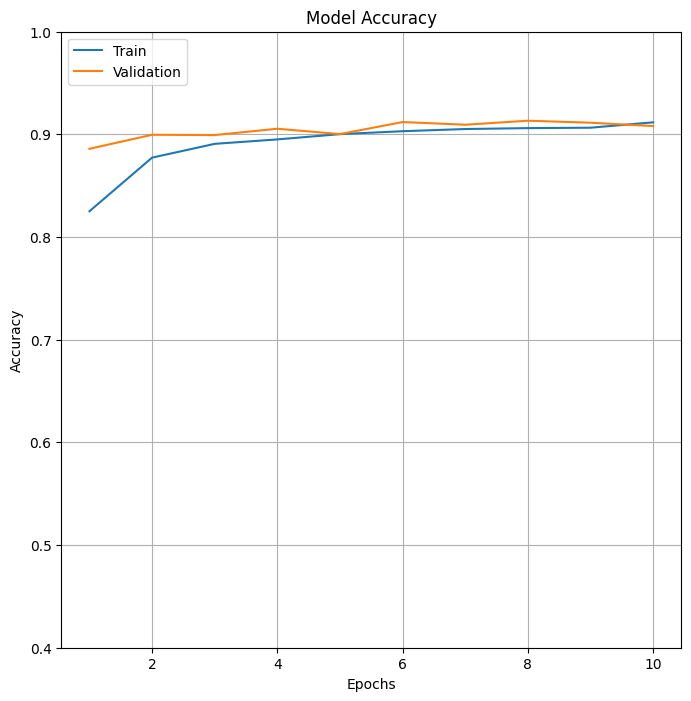

<Figure size 640x480 with 0 Axes>

In [7]:

import matplotlib.pyplot as plt

epochs = 10

plt.figure(figsize=(8, 8))

epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')

plt.ylim(0.4, 1.0)
plt.grid(True)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
plt.savefig('output-plot.png')


In [8]:
import numpy as np
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(custom_efficientnet_model.predict(x), axis=1))

target_names = ['HEATHLY','MLN_1_and_MLN_2','MSV_2','MSV_1']

print(classification_report(y_true, y_pred, target_names=target_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

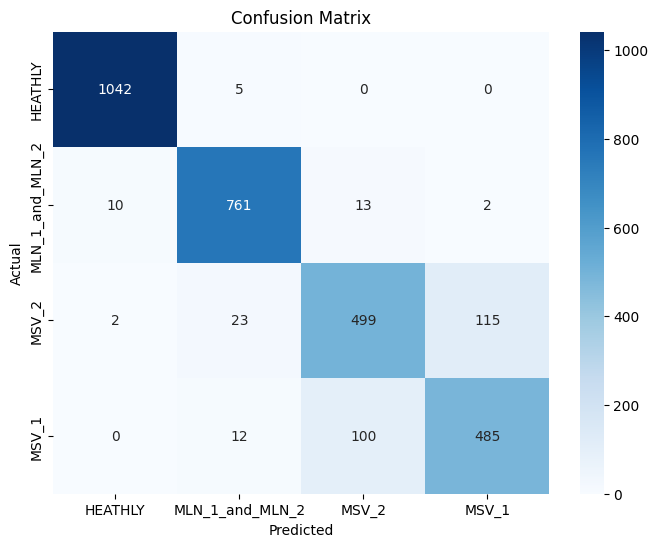

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['HEATHLY','MLN_1_and_MLN_2','MSV_2','MSV_1']
y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(custom_efficientnet_model.predict(x), axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

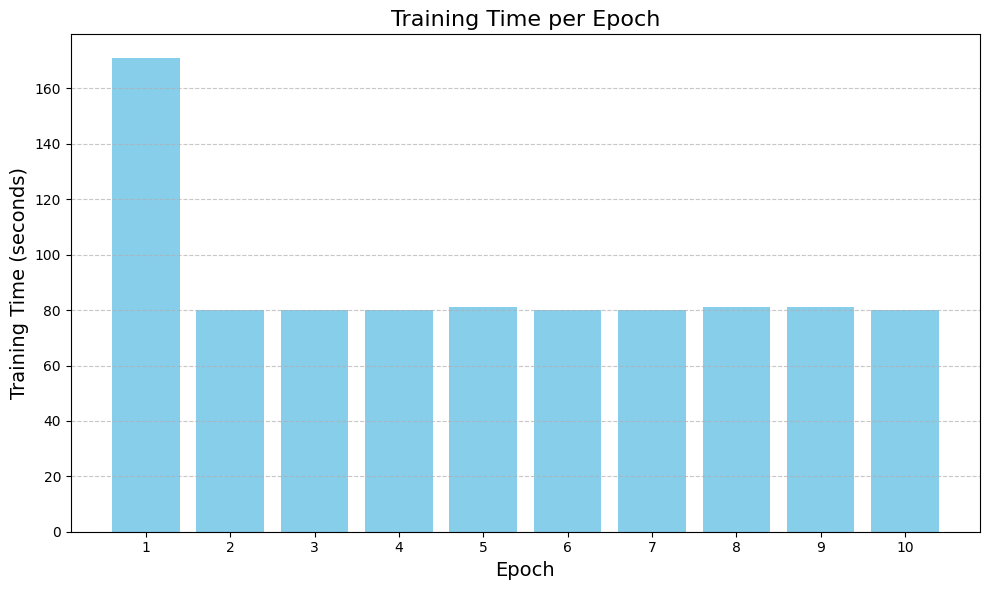

In [22]:
import matplotlib.pyplot as plt

# Epoch data extracted from the training logs
epochs = list(range(1, 11))
training_time = [171,80,80,80,81,80,80,81,81,80]  # Training times in seconds

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(epochs, training_time, color='skyblue')

# Adding labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.title('Training Time per Epoch', fontsize=16)
plt.xticks(epochs)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()


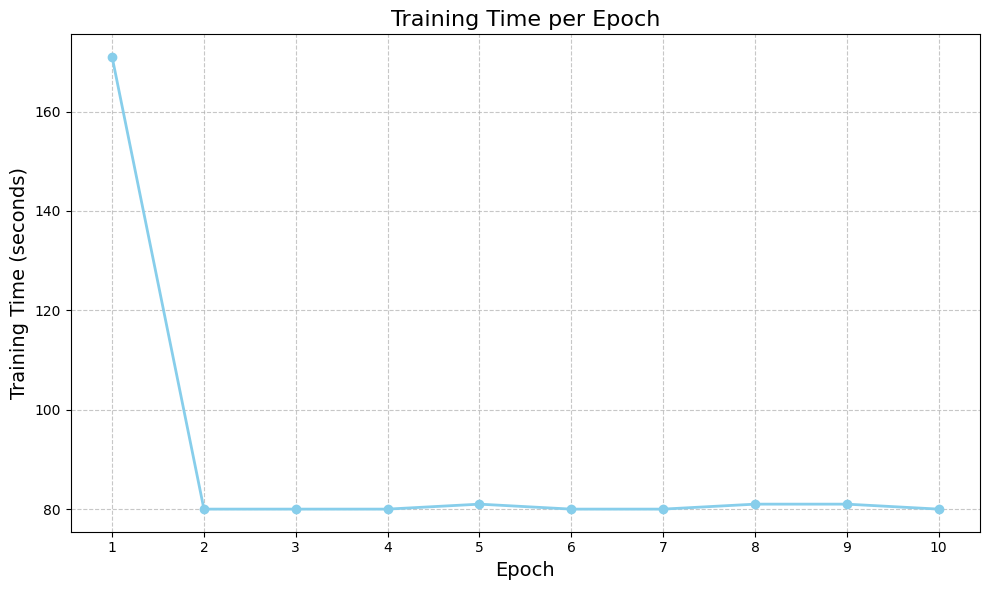

In [21]:
import matplotlib.pyplot as plt

# Epoch data extracted from the training logs
epochs = list(range(1, 11))
training_time = [171, 80, 80, 80, 81, 80, 80, 81, 81, 80]  # Training times in seconds

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_time, marker='o', color='skyblue', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.title('Training Time per Epoch', fontsize=16)
plt.xticks(epochs)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the line graph
plt.tight_layout()
plt.show()
